In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
%matplotlib inline
from nltk.corpus import stopwords
import nltk

In [148]:
df = pd.read_csv("data 2_train.csv")

In [149]:
a = [5,6,7,8]

In [150]:
stops = set(stopwords.words("english"))
words = ["i" ,"was" ,"in", "the", "bathroom"]
words = [word for word in words if word not in stops]
words

['bathroom']

In [151]:
aspect_terms = df[' aspect_term']
#fetching and pre-processing aspect_terms
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
aspect_terms = [aspect_term.replace("[comma]","") for aspect_term in aspect_terms]
aspect_terms = [aspect_term.lower() for aspect_term in aspect_terms]
aspect_terms = ["".join(aspect_term) for aspect_term in aspect_terms]
aspect_terms

['staff',
 'food',
 'food',
 'kitchen',
 'menu',
 'food',
 'perks',
 'orrechiete with sausage and chicken',
 'waiters',
 'meats',
 'dish',
 'bagels',
 'food',
 'toast',
 'mayonnaise',
 'bacon',
 'cheese',
 'ingredients',
 'plate',
 'omelet',
 'drinks',
 'check',
 'design',
 'atmosphere',
 'cuisine',
 'pizza',
 'thin crusted pizza',
 'interior decoration',
 'chefs',
 'seats',
 'seltzer with lime',
 'pickles',
 'selection of meats and seafoods',
 'dishes',
 'eat family style',
 'vibe',
 'owner',
 'service',
 'delivery',
 'food',
 'atmosphere',
 'service',
 'food',
 'prices',
 'interior decor',
 'prices',
 'wine',
 'price',
 'service',
 'quantity',
 'sushi',
 'sushi bar',
 'fried rice',
 'mussels',
 'puff pastry goat cheese',
 'salad with a delicious dressing',
 'hanger steak au poivre',
 'courses',
 'indian food',
 'service',
 'place',
 'broth with noodles',
 'meal',
 'money',
 'wine list',
 'thai food',
 'glass of wine',
 'specials',
 'lunch',
 'dinner',
 'dine',
 'atmosphere',
 'servic

In [152]:
def consider_aspect(messages, aspect_terms, method,ws, v):
    new_messages = []
    if method=="context_window":
        for message,aspect_term in zip(messages,aspect_terms):
            new_message=[]
            message = message.replace(aspect_term,"aspect")
            message = message.split()
            for position,word in enumerate(message):
                if word == "aspect":
                    
                    start = position - ws
                    if start < 0:
                        start = 0
                    stop = position + ws + 1
                    for ii in range(start,stop):
                        try:
                            new_message.append(message[ii])
                        except :
                            continue
            new_message = " ".join(new_message)
            message = " ".join(message)
            new_message = new_message.replace("aspect",aspect_term)
            message = message.replace("aspect",aspect_term)
            new_messages.append(new_message)
        X = v.fit_transform(new_messages)
        return X
    
    elif method == "without_aspect":
        X = v.fit_transform(messages)
        return X

In [153]:
def preprocess_messages(messages, aspect_terms, rem_sw=False, embedding="cv", ngram=(1,1), method="without_aspect",ws=4):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    messages = [message.replace("[comma]","") for message in messages]
    messages = [message.lower() for message in messages]
    messages = [tokenizer.tokenize(message) for message in messages]
    if rem_sw == True:
        from nltk.corpus import stopwords
        stops = set(stopwords.words("english")) 
        msgs = []
        for message in messages:
            message = [word for word in message if word not in stops]
            msgs.append(message)
        messages = msgs
    messages = [" ".join(message) for message in messages]  
    if embedding=="cv":
        from sklearn.feature_extraction.text import CountVectorizer
        v = CountVectorizer(analyzer = 'word',ngram_range=ngram)
    elif embedding == "tf-idf":
        from sklearn.feature_extraction.text import TfidfVectorizer
        v = TfidfVectorizer(analyzer = 'word', ngram_range=ngram)
    X = consider_aspect(messages,aspect_terms,method,ws,v)
    
    return X

In [154]:
def run_ML_models(X,labels):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3)
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score,classification_report
    from sklearn.metrics import recall_score, f1_score
    from sklearn.cross_validation import cross_val_score,cross_val_predict
    from sklearn.model_selection import StratifiedKFold
    from sklearn import tree
    lr = LogisticRegression(C=0.000000001,solver='liblinear')
    nb = MultinomialNB(fit_prior=False, alpha=0.3)
    svc = SVC(kernel = 'linear', max_iter = 1000)
    knn = KNeighborsClassifier(n_neighbors=5)
    dt = tree.DecisionTreeClassifier()
    rf = RandomForestClassifier(n_estimators=10)
    clfs=[lr,nb,knn,dt,rf,svc]
    names= ["Logistic Regression","Naive Bayes","Nearest Neighbours","Decision Tree","Random Forest","SVM"]
    i=0
    for clf in clfs:
        pred = cross_val_predict(clf,X_train,list(y_train),cv=10)
        print("THe Training report for "+str(names[i]))
        print(classification_report(list(y_train),pred))
        print("The accuracy for "+names[i]+" is :"+str(accuracy_score(list(y_train),pred)))
        i+=1
        clf.fit(X_train,y_train)
    i=0
    for clf in clfs:
        pred = clf.predict(X_test)
        print("THe testing report for "+str(names[i]))
        print(classification_report(list(y_test),pred))
        print("The accuracy for "+names[i]+" is :"+str(accuracy_score(list(y_test),pred)))
        i+=1

In [155]:
messages = df[' text']
labels = df[' class']
X = preprocess_messages(messages,aspect_terms, embedding="tf-idf",method="context_window",rem_sw=False,ngram=(1,2),ws=5)
run_ML_models(X,labels)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


THe Training report for Logistic Regression
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00       560
          0       0.00      0.00      0.00       451
          1       0.60      1.00      0.75      1510

avg / total       0.36      0.60      0.45      2521

The accuracy for Logistic Regression is :0.5989686632288774
THe Training report for Naive Bayes
             precision    recall  f1-score   support

         -1       0.54      0.62      0.58       560
          0       0.43      0.55      0.48       451
          1       0.87      0.75      0.80      1510

avg / total       0.72      0.68      0.70      2521

The accuracy for Naive Bayes is :0.6842522808409361
THe Training report for Nearest Neighbours
             precision    recall  f1-score   support

         -1       0.30      0.12      0.17       560
          0       0.28      0.15      0.19       451
          1       0.62      0.85      0.72      1510

avg / total    

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sk

THe Training report for SVM
             precision    recall  f1-score   support

         -1       0.69      0.42      0.52       560
          0       0.64      0.28      0.39       451
          1       0.72      0.95      0.82      1510

avg / total       0.70      0.71      0.68      2521

The accuracy for SVM is :0.7132090440301467
THe testing report for Logistic Regression
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00       245
          0       0.00      0.00      0.00       182
          1       0.60      1.00      0.75       654

avg / total       0.37      0.60      0.46      1081

The accuracy for Logistic Regression is :0.6049953746530989
THe testing report for Naive Bayes
             precision    recall  f1-score   support

         -1       0.52      0.69      0.59       245
          0       0.46      0.61      0.53       182
          1       0.90      0.71      0.80       654

avg / total       0.74      0.69      0.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


THe testing report for SVM
             precision    recall  f1-score   support

         -1       0.69      0.51      0.58       245
          0       0.62      0.29      0.39       182
          1       0.75      0.94      0.83       654

avg / total       0.72      0.73      0.70      1081

The accuracy for SVM is :0.730804810360777


([<matplotlib.axis.XTick at 0x1b6e4d615f8>,
 <a list of 3 Text xticklabel objects>)

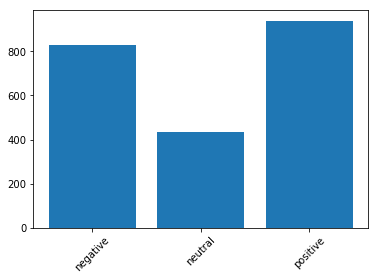

In [143]:
ul = [1,-1,0]
plt.bar(ul,labels.value_counts())
plt.xticks(ul,['positive','negative','neutral'],rotation=45)

In [144]:
type(X)

scipy.sparse.csr.csr_matrix

In [ ]:
for message,aspect_term in zip(messages,aspect_terms):
    new_message=[]
    message = message.replace(aspect_term,"aspect")
    message = message.split()
    for position,word in enumerate(message):
        if word == "aspect":

            start = position - ws
            if start < 0:
                start = 0
            stop = position + ws + 1
            for ii in range(start,stop):
                try:
                    new_message.append(message[ii])
                except :
                    continue
    new_message = " ".join(new_message)
    message = " ".join(message)
    new_message = new_message.replace("aspect",aspect_term)
    message = message.replace("aspect",aspect_term)
    new_messages.append(new_message)